# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import sklearn
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Set Figure Size**

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 5]

# **Loading Data**

In [ ]:
# from google.colab import files
# data_to_load = files.upload()

In [4]:
train = pd.read_csv('train.csv')

# **Data Exploration**

Shape of the dataset

In [5]:
train.shape

(10886, 12)

Sample of first few rows

In [6]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Variables data type

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Checking if there is any missing value

In [8]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

###**Create New Columns From "datetime"**

In [9]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0])
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['year'] = train['date'].apply(lambda x:x.split('-')[0])
train['month'] = train['date'].apply(lambda x:x.split('-')[1])
train['day'] = train['date'].apply(lambda x:x.split('-')[2])
train['weekend'] = 0
train.loc[(train.holiday == 0) & (train.workingday == 0),'weekend'] = 1

### **Delete Unnecessary Columns**

In [10]:
del train['datetime']
del train['date']

In [11]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,month,day,weekend
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,00,2011,01,01,1
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01,2011,01,01,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,02,2011,01,01,1
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,03,2011,01,01,1
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,04,2011,01,01,1


### **Coercing To Category Type**

In [12]:
for col in ['season','holiday','workingday','weather','hour','year','day','month','weekend']:
    train[col]=train[col].astype('category')

In [13]:
train.dtypes

season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
hour          category
year          category
month         category
day           category
weekend       category
dtype: object

# **Multivariate Analysis**

## **Trends Of Dataset**

In [14]:
sn.set_style(style='whitegrid')

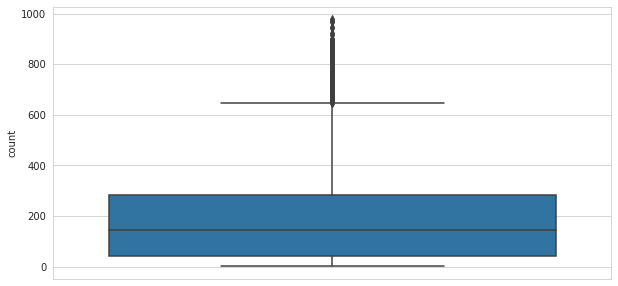

In [15]:
sn.boxplot(data=train, y='count')

### **Season Trend**

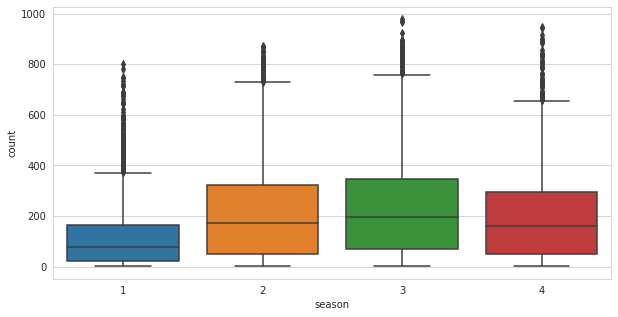

In [16]:
sn.boxplot(data=train, x='season', y='count')

### **Hourly Trend**

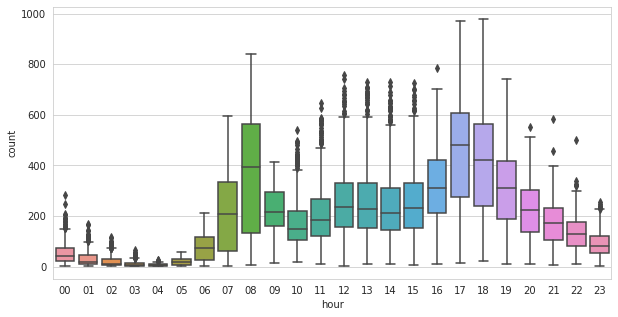

In [17]:
sn.boxplot(data=train, x='hour', y='count')

The distribution of registered and casual users separately.

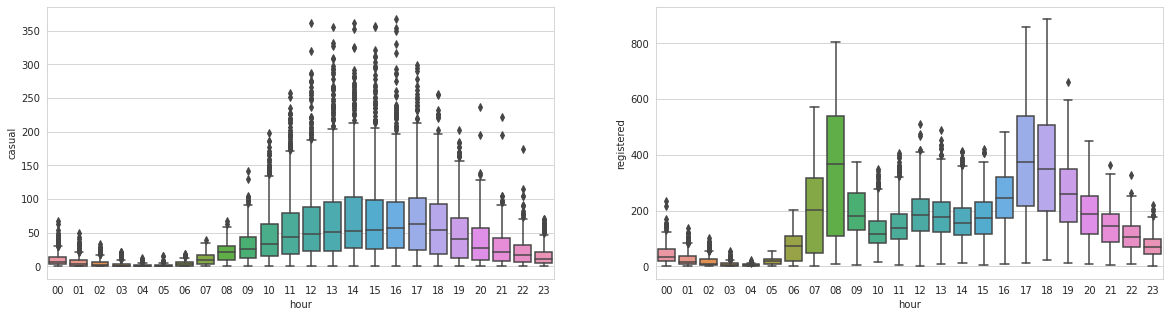

In [18]:
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(20, 5)
sn.boxplot(data=train, x='hour', y='casual', ax=axes[0])
sn.boxplot(data=train, x='hour', y='registered', ax=axes[1])


### **Temp Trend**

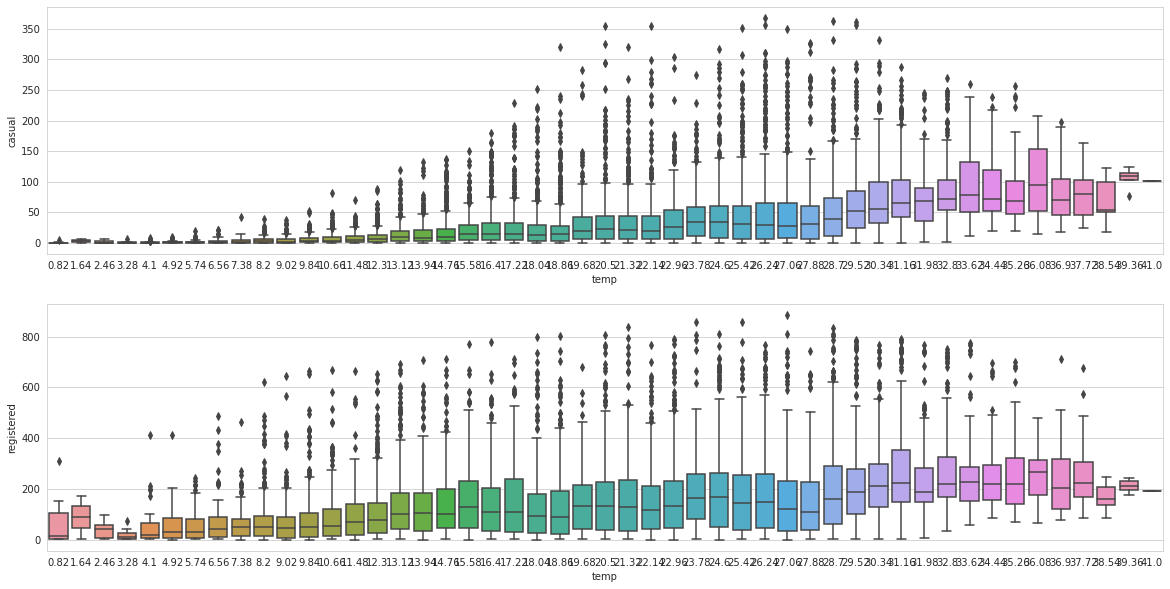

In [19]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(20, 10)
sn.boxplot(data=train, x='temp', y='casual', ax=axes[0])
sn.boxplot(data=train, x='temp', y='registered', ax=axes[1])

### **Weather Trend**

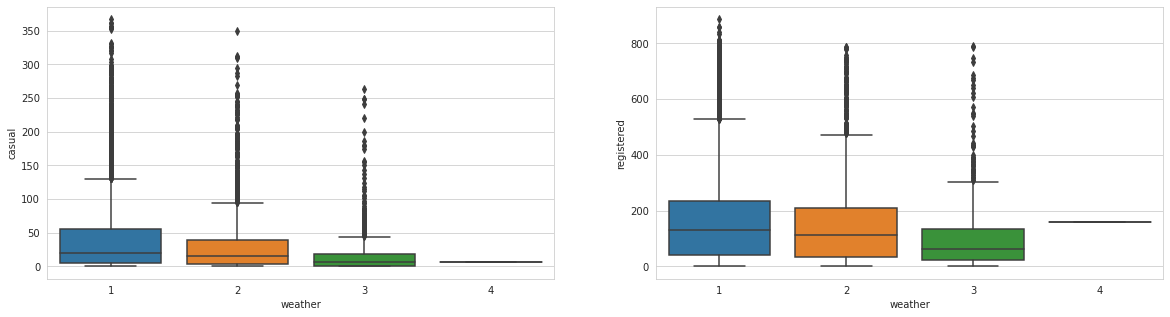

In [20]:
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(20, 5)
sn.boxplot(data=train, x='weather', y='casual', ax=axes[0])
sn.boxplot(data=train, x='weather', y='registered', ax=axes[1])

### **Time Trend**

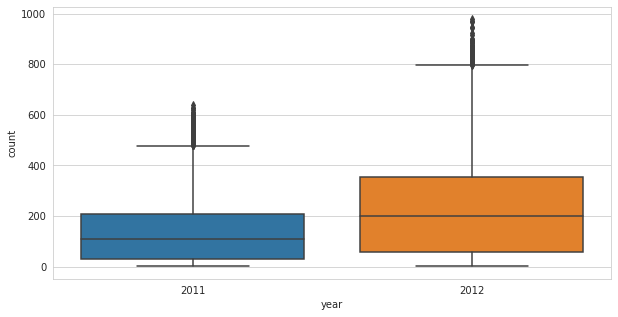

In [21]:
sn.boxplot(data=train, x='year', y='count')

# **Correlation Analysis**

In [22]:
cor = train[['temp','atemp','humidity','windspeed','casual','registered','count']].corr()
cor

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


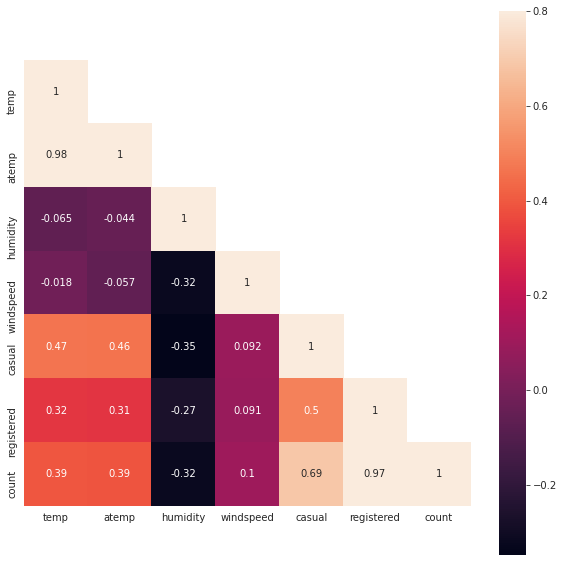

In [23]:
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize=(10,10))
sn.heatmap(cor, mask=mask,vmax=.8, square=True, annot=True)

As can be seen, "atemp" is variable is not taken into since "atemp" and "temp" has got strong correlation with each other. 

# **Feature Engineering**

## **Hour Bins**

The hour is categorized into three categories separately for casual and registered users

In [24]:
train['hour'] = train['hour'].astype('int64')
train['hour_cas'] = 0
train.loc[train['hour']<=7,'hour_cas'] = 1
train.loc[(train['hour']>=8) & (train['hour']<=11),'hour_cas'] = 2
train.loc[(train['hour']>=12) & (train['hour']<=17),'hour_cas'] = 3
train.loc[(train['hour']>=18),'hour_cas'] = 1
train['hour_cas'] = train['hour_cas'].astype('category')

In [25]:
train['hour_reg']=0
train.loc[train['hour']<=6,'hour_reg'] = 1
train.loc[(train['hour']>=7) & (train['hour']<=10),'hour_reg'] = 2
train.loc[(train['hour']>=11) & (train['hour']<=16),'hour_reg'] = 3
train.loc[(train['hour']>=17) & (train['hour']<=20),'hour_reg'] = 2
train.loc[(train['hour']>=21),'hour_reg'] = 1
train['hour_cas'] = train['hour_reg'].astype('category')
train['hour'] = train['hour'].astype('category')

## **Temp Bins**

Using similar methods, we have created bins for temperature for both registered and casuals users.

In [26]:
train['temp_cas'] = 0
train.loc[train['temp']<15,'temp_cas'] = 1
train.loc[(train['temp']>=15) & (train['temp']<23),'temp_cas'] = 2
train.loc[(train['temp']>=23) & (train['temp']<30),'temp_cas'] = 3
train.loc[(train['temp']>=30),'temp_cas'] = 4

In [27]:
train['temp_reg'] = 0
train.loc[train['temp']<13,'temp_reg'] = 1
train.loc[(train['temp']>=13) & (train['temp']<23),'temp_reg'] = 2
train.loc[(train['temp']>=23) & (train['temp']<30),'temp_reg'] = 3
train.loc[(train['temp']>=30),'temp_reg'] = 4
train['temp_reg'] = train['temp_reg'].astype('category')
train['temp'] = train['temp'].astype('category')

## **Log Of Target Variables**

Converting target variables registered and casual into log(a+1) form

In [29]:
train['target_cas'] = np.log1p(train['casual']+1)
train['target_reg'] = np.log1p(train['registered']+1)

## **Feature**

In [30]:
features_cas=['season', 'holiday', 'workingday', 'weather', 'humidity', 
              'windspeed', 'hour', 'year', 'day', 'month', 'weekend', 'hour_cas', 'temp_cas']
features_reg=['season', 'holiday', 'workingday', 'weather', 'humidity', 
              'windspeed', 'hour', 'year', 'day', 'month', 'weekend', 'hour_reg', 'temp_reg']

# **RMSLE Scorer**

In [28]:
def RMSLE(y, ypred):
    y = np.nan_to_num(y)
    ypred = np.nan_to_num(ypred)
    calc = (ypred-y)**2
    return np.sqrt(np.mean(calc))

# **Model Building**

Splitting into training and test set using scikit's train_test_split package

In [31]:
from sklearn.model_selection import train_test_split
xtrain_cas, xtest_cas, ytrain_cas, ytest_cas = train_test_split(train[features_cas].values, 
                                                                np.ravel(train['target_cas'].values), test_size=0.25)
xtrain_reg, xtest_reg, ytrain_reg, ytest_reg = train_test_split(train[features_reg].values, 
                                                                np.ravel(train['target_reg'].values), test_size=0.25)

In [32]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV

## **Linear Regression Model**

In [34]:
clf_1_cas = LinearRegression()
clf_1_cas.fit(xtrain_cas,ytrain_cas)
print("RMSLE score for casual train %f" %(RMSLE(ytrain_cas, clf_1_cas.predict(xtrain_cas))))
print("RMSLE score for casual test %f" %(RMSLE(ytest_cas, clf_1_cas.predict(xtest_cas))))

clf_1_reg = LinearRegression()
clf_1_reg.fit(xtrain_reg, ytrain_reg)
print("RMSLE score for registered train %f" %(RMSLE(ytrain_reg, clf_1_reg.predict(xtrain_reg))))
print("RMSLE score for registered test %f" %(RMSLE(ytest_reg, clf_1_reg.predict(xtest_reg))))

RMSLE score for casual train 0.696134
RMSLE score for casual test 0.688889
RMSLE score for registered train 0.845600
RMSLE score for registered test 0.867101


## **Regularization Model - Ridge**

In [35]:
clf_2_cas = Ridge()
params = {'alpha':[0.01,0.05,0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer=sklearn.metrics.make_scorer(RMSLE, greater_is_better=False)
grid_2_cas = GridSearchCV(clf_2_cas, param_grid=params, scoring=rmsle_scorer, cv=5)
grid_2_cas.fit(xtrain_cas, ytrain_cas)
print("Best params", grid_2_cas.best_params_)
print("RMSLE score for casual train %f" %(RMSLE(ytrain_cas, grid_2_cas.best_estimator_.predict(xtrain_cas))))
print("RMSLE score for casual test %f" %(RMSLE(ytest_cas, grid_2_cas.best_estimator_.predict(xtest_cas))))

clf_2_reg = Ridge()
grid_2_reg = GridSearchCV(clf_2_reg, param_grid=params, scoring=rmsle_scorer, cv=5)
grid_2_reg.fit(xtrain_reg, ytrain_reg)
print("Best params", grid_2_reg.best_params_)
print("RMSLE score for registered train %f" %(RMSLE(ytrain_reg,grid_2_reg.best_estimator_.predict(xtrain_reg))))
print("RMSLE score for registered test %f" %(RMSLE(ytest_reg, grid_2_reg.best_estimator_.predict(xtest_reg))))

Best params {'alpha': 10}
RMSLE score for casual train 0.696136
RMSLE score for casual test 0.688858
Best params {'alpha': 10}
RMSLE score for registered train 0.845602
RMSLE score for registered test 0.867090


## **Regularization Model - Lasso**

In [53]:
clf_3_cas = Lasso()
params = {'alpha': np.linspace(0.001,10,15)}
grid_3_cas = GridSearchCV(clf_2_cas, param_grid=params, scoring=rmsle_scorer, cv=5)
grid_3_cas.fit(xtrain_cas, ytrain_cas)
print("Best params", grid_3_cas.best_params_)
print("RMSLE score for casual train %f" %(RMSLE(ytrain_cas, grid_3_cas.best_estimator_.predict(xtrain_cas))))
print("RMSLE score for casual test %f" %(RMSLE(ytest_cas, grid_3_cas.best_estimator_.predict(xtest_cas))))

clf_3_reg = Ridge()
grid_3_reg = GridSearchCV(clf_3_reg, param_grid=params, scoring=rmsle_scorer, cv=5)
grid_3_reg.fit(xtrain_reg, ytrain_reg)
print("Best params", grid_3_reg.best_params_)
print("RMSLE score for registered train %f" %(RMSLE(ytrain_reg, grid_3_reg.best_estimator_.predict(xtrain_reg))))
print("RMSLE score for registered test %f" %(RMSLE(ytest_reg, grid_3_reg.best_estimator_.predict(xtest_reg))))

Best params {'alpha': 9.285785714285716}
RMSLE score for casual train 0.696136
RMSLE score for casual test 0.688860
Best params {'alpha': 10.0}
RMSLE score for registered train 0.845602
RMSLE score for registered test 0.867090


## **Ensemble Models - Random Forest**

In [37]:
from sklearn.ensemble import RandomForestRegressor
clf_4_cas = RandomForestRegressor()
param = {'n_estimators':[100,200,300,400,500], 'max_depth':[4,5,6,7,8,9,10]}
grid_4_cas = GridSearchCV(clf_4_cas, param_grid=param, scoring=rmsle_scorer, cv=5, n_jobs=4)
grid_4_cas.fit(xtrain_cas, ytrain_cas)
print("Best params", grid_4_cas.best_params_)
print("RMSLE score for casual train %f" %(RMSLE(ytrain_cas, grid_4_cas.best_estimator_.predict(xtrain_cas))))
print("RMSLE score for casual test %f" %(RMSLE(ytest_cas, grid_4_cas.best_estimator_.predict(xtest_cas))))

clf_4_reg = RandomForestRegressor()
grid_4_reg = GridSearchCV(clf_4_reg, param_grid=param, scoring=rmsle_scorer, cv=5, n_jobs=4)
grid_4_reg.fit(xtrain_reg, ytrain_reg)
print("Best params", grid_4_reg.best_params_)
print("RMSLE score for registered train %f" %(RMSLE(ytrain_reg, grid_4_reg.best_estimator_.predict(xtrain_reg))))
print("RMSLE score for registered test %f" %(RMSLE(ytest_reg, grid_4_reg.best_estimator_.predict(xtest_reg))))

Best params {'max_depth': 10, 'n_estimators': 500}
RMSLE score for casual train 0.329737
RMSLE score for casual test 0.438781
Best params {'max_depth': 10, 'n_estimators': 500}
RMSLE score for registered train 0.216358
RMSLE score for registered test 0.321653


## **Ensemble Model - Gradient Boost**

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
clf_5_cas = GradientBoostingRegressor()
param = {'n_estimators':[1000,2000,3000,4000], 'max_depth' : [10,15,20,25]}
grid_5_cas = GridSearchCV(clf_5_cas, param_grid=param, scoring=rmsle_scorer, cv=5, n_jobs=4)
grid_5_cas.fit(xtrain_cas, ytrain_cas)
print("Best params", grid_5_cas.best_params_)
print("RMSLE score for casual train %f" %(RMSLE(ytrain_cas, grid_5_cas.best_estimator_.predict(xtrain_cas))))
print("RMSLE score for casual test %f" %(RMSLE(ytest_cas, grid_5_cas.best_estimator_.predict(xtest_cas))))

clf_5_reg = GradientBoostingRegressor()
grid_5_reg = GridSearchCV(clf_5_reg, param_grid=param, scoring=rmsle_scorer, cv=5, n_jobs=4)
grid_5_reg.fit(xtrain_reg, ytrain_reg)
print("Best params", grid_5_reg.best_params_)
print("RMSLE score for registered train %f" %(RMSLE(ytrain_reg, grid_5_reg.best_estimator_.predict(xtrain_reg))))
print("RMSLE score for registered test %f" %(RMSLE(ytest_reg, grid_5_reg.best_estimator_.predict(xtest_reg))))

Best params {'max_depth': 10, 'n_estimators': 3000}
RMSLE score for casual train 0.000316
RMSLE score for casual test 0.430104
Best params {'max_depth': 10, 'n_estimators': 4000}
RMSLE score for registered train 0.000316
RMSLE score for registered test 0.313063
